<h1>Section 1 - Importing Packages and Data, with First Observations</h1>

In [1]:
#Importing packages

import glob #Used to find all files/pathnames matching a specific pattern
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook #Allows the creation of Bokeh plots which will work in Jupyter notebook
from bokeh.io import output_file #Allows interactive Bokeh plots to be saved as standalone HTML files
#Importing Bokeh data structures that can map Pandas DataFrames to plots and show tooltips with data values when you hover over a glyph
from bokeh.models import ColumnDataSource, HoverTool, Legend, LegendItem, Div, TextInput
from bokeh.layouts import column
from bokeh.palettes import Category20, Viridis256 #A couple of colour palettes. The Viridis256 palette is especially useful as it is colourblind friendly
from bokeh.transform import factor_cmap #Maps categories to colours in a palette to ensure consistent colour mapping across multiple glyphs

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'combined_df.csv',
 'crypto_moving_average_volatility_by_consensus.html',
 'crypto_rolling_volatility_by_crypto.html',
 'rolling_volatility_over_time_by_consensus_mechanism.png',
 'volatility_distribution_by_consensus_mechanism.png',
 'crypto_avg_market_cap_by_consensus.html',
 'crypto_max_market_cap.html',
 'Historical data CSVs',
 'average_annualised_volatility_by_consensus_mechanism.png',
 'crypto_rolling_volatility_by_consensus.html',
 'Crypto Analysis Portfolio.ipynb',
 'crypto_avg_market_cap_by_consensus_excluding_bitcoin.html']

In [3]:
#Importing data into Pandas

#Creating a list of file paths, as each crypto has it's own historical data file
#file_paths = glob.glob('Historical data CSVs/*.csv')

#Loop to read each csv file in list of file paths, add a 'name' column from crypto name mentioned in file name, and append to list of crypto DataFrames
#dfs = []
#for file in file_paths:
    #df = pd.read_csv(file, delimiter=';')
    #crypto_name = os.path.basename(file).split('_')[0] #Extracts the crypto name as everything before the first '_' character
    #df['name'] = crypto_name
    #dfs.append(df)
    
#Combining all crypto DataFrames into single DataFrame called combined_df
#combined_df = pd.concat(dfs, ignore_index=True)

#Exporting the DataFrame to a CSV file
#combined_df.to_csv('combined_df.csv', index=False)

#If using the exported CSV file called combined_df, use the code below
combined_df = pd.read_csv('combined_df.csv')

#Initial observation of DataFrame
combined_df.head()

timeOpen                 timeClose  \
0  2024-06-12T00:00:00.000Z  2024-06-12T23:59:59.999Z   
1  2024-06-11T00:00:00.000Z  2024-06-11T23:59:59.999Z   
2  2024-06-10T00:00:00.000Z  2024-06-10T23:59:59.999Z   
3  2024-06-09T00:00:00.000Z  2024-06-09T23:59:59.999Z   
4  2024-06-08T00:00:00.000Z  2024-06-08T23:59:59.999Z   

                   timeHigh                   timeLow      name      open  \
0  2024-06-12T13:08:00.000Z  2024-06-12T01:49:00.000Z  Starknet  1.035496   
1  2024-06-11T01:16:00.000Z  2024-06-11T23:31:00.000Z  Starknet  1.118078   
2  2024-06-10T00:47:00.000Z  2024-06-10T20:14:00.000Z  Starknet  1.168489   
3  2024-06-09T17:06:00.000Z  2024-06-09T02:58:00.000Z  Starknet  1.131222   
4  2024-06-08T00:41:00.000Z  2024-06-08T17:37:00.000Z  Starknet  1.205594   

       high       low     close        volume     marketCap  \
0  1.104741  0.995784  1.071657  9.352629e+07  1.393489e+09   
1  1.122288  1.032975  1.035643  1.081552e+08  1.346659e+09   
2  1.170466  1.110594  1.118071  9.274183e+07  1.453841e+09   
3  1.189379  1.116557  1.168407  8.025459e+07  1.519294e+09   
4  1.209088  1.118499  1.131362  1.317345e+08  1.471123e+09   

                  timestamp  
0  2024-06-12T23:59:59.999Z  
1  2024-06-11T23:59:59.999Z  
2  2024-06-10T23:59:59.999Z  
3  2024-06-09T23:59:59.999Z  
4  2024-06-08T23:59:59.999Z

In [4]:
combined_df.tail()

timeOpen                 timeClose  \
64504  2023-05-15T00:00:00.000Z  2023-05-15T23:59:59.999Z   
64505  2023-05-14T00:00:00.000Z  2023-05-14T23:59:59.999Z   
64506  2023-05-13T00:00:00.000Z  2023-05-13T23:59:59.999Z   
64507  2023-05-12T00:00:00.000Z  2023-05-12T23:59:59.999Z   
64508  2023-05-11T00:00:00.000Z  2023-05-11T23:59:59.999Z   

                       timeHigh                   timeLow   name        open  \
64504  2023-05-15T15:33:00.000Z  2023-05-15T00:56:00.000Z  Maker  626.382271   
64505  2023-05-14T09:13:00.000Z  2023-05-14T19:28:00.000Z  Maker  632.440589   
64506  2023-05-13T00:04:00.000Z  2023-05-13T14:33:00.000Z  Maker  638.047946   
64507  2023-05-12T23:22:00.000Z  2023-05-12T05:55:00.000Z  Maker  622.242561   
64508  2023-05-11T00:00:00.000Z  2023-05-11T19:49:00.000Z  Maker  660.642730   

             high         low       close       volume     marketCap  \
64504  645.097508  621.263361  637.247064  15172331.74  6.229925e+08   
64505  637.404906  624.041843  626.382718  21713167.01  6.123712e+08   
64506  638.347433  628.686347  632.569602  24767535.07  6.184197e+08   
64507  639.896048  613.116510  638.052291  29845291.68  6.237797e+08   
64508  660.642730  610.821145  622.258175  20612996.98  6.083389e+08   

                      timestamp  
64504  2023-05-15T23:59:59.999Z  
64505  2023-05-14T23:59:59.999Z  
64506  2023-05-13T23:59:59.999Z  
64507  2023-05-12T23:59:59.999Z  
64508  2023-05-11T23:59:59.999Z

In [5]:
combined_df.sample(5)

timeOpen                 timeClose  \
25558  2024-04-02T00:00:00.000Z  2024-04-02T23:59:59.999Z   
39401  2023-12-15T00:00:00.000Z  2023-12-15T23:59:59.999Z   
52457  2023-05-19T00:00:00.000Z  2023-05-19T23:59:59.999Z   
46685  2024-03-04T00:00:00.000Z  2024-03-04T23:59:59.999Z   
25277  2023-09-25T00:00:00.000Z  2023-09-25T23:59:59.999Z   

                       timeHigh                   timeLow           name  \
25558  2024-04-02T00:01:00.000Z  2024-04-02T11:31:00.000Z  Axie Infinity   
39401  2023-12-15T01:46:00.000Z  2023-12-15T23:45:00.000Z            XRP   
52457  2023-05-19T07:13:00.000Z  2023-05-19T23:57:00.000Z         Render   
46685  2024-03-04T08:38:00.000Z  2024-03-04T18:01:00.000Z       Lido DAO   
25277  2023-09-25T16:22:00.000Z  2023-09-25T00:26:00.000Z   Bitcoin Cash   

             open        high         low       close        volume  \
25558   10.267953   10.269671    9.468726    9.491161  7.493841e+07   
39401    0.632436    0.641949    0.615082    0.615492  1.392240e+09   
52457    2.398396    2.450429    2.317324    2.318871  1.804658e+08   
46685    3.318825    3.400696    3.164396    3.284928  1.367846e+08   
25277  204.759837  213.200625  203.349114  210.320699  1.435899e+08   

          marketCap                 timestamp  
25558  1.355664e+09  2024-04-02T23:59:59.999Z  
39401  3.324004e+10  2023-12-15T23:59:59.999Z  
52457  8.495835e+08  2023-05-19T23:59:59.999Z  
46685  2.929109e+09  2024-03-04T23:59:59.999Z  
25277  4.104286e+09  2023-09-25T23:59:59.999Z

In [6]:
#Preliminary info about DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64509 entries, 0 to 64508
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   64509 non-null  object 
 1   timeClose  64509 non-null  object 
 2   timeHigh   64509 non-null  object 
 3   timeLow    64509 non-null  object 
 4   name       64509 non-null  object 
 5   open       64509 non-null  float64
 6   high       64509 non-null  float64
 7   low        64509 non-null  float64
 8   close      64509 non-null  float64
 9   volume     64509 non-null  float64
 10  marketCap  64509 non-null  float64
 11  timestamp  64509 non-null  object 
dtypes: float64(6), object(6)
memory usage: 5.9+ MB


In [7]:
combined_df.describe()

open          high           low         close        volume  \
count  6.450900e+04  6.450900e+04  6.450900e+04  6.450900e+04  6.450900e+04   
mean   4.487131e+02  4.577155e+02  4.397944e+02  4.493421e+02  1.203401e+09   
std    3.951487e+03  4.030010e+03  3.873825e+03  3.958731e+03  6.275856e+09   
min    5.685057e-08  7.956576e-08  2.763783e-08  6.637550e-08  0.000000e+00   
25%    2.451538e-01  2.536531e-01  2.355028e-01  2.451863e-01  2.112293e+07   
50%    1.117208e+00  1.153641e+00  1.077412e+00  1.116810e+00  7.366418e+07   
75%    9.839346e+00  1.017347e+01  9.469416e+00  9.838202e+00  2.364437e+08   
max    7.307937e+04  7.375007e+04  7.133409e+04  7.308350e+04  1.898671e+11   

          marketCap  
count  6.450900e+04  
mean   1.505199e+10  
std    8.198319e+10  
min    0.000000e+00  
25%    6.055306e+08  
50%    1.321573e+09  
75%    3.576460e+09  
max    1.436272e+12

In [8]:
combined_df.shape

(64509, 12)

In [9]:
#Number of null values in each column
combined_df.isnull().sum()

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
name         0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

In [10]:
#Unique cryptocurrency names in the DataFrame
print(f"There are {combined_df['name'].nunique()} unique cryptocurrencies in this DataFrame")

There are 100 unique cryptocurrencies in this DataFrame


<h1>Section 2 - Pre-processing, Cleaning and Standardising</h1>

In [11]:
#Converting all time columns to datetime

combined_df['timeOpen'] = pd.to_datetime(combined_df['timeOpen'])
combined_df['timeClose'] = pd.to_datetime(combined_df['timeClose'])
combined_df['timeHigh'] = pd.to_datetime(combined_df['timeHigh'])
combined_df['timeLow'] = pd.to_datetime(combined_df['timeLow'])
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

In [12]:
#Standardising column names using snake_case naming convention

#Dictionary for renaming columns
new_columns = {
    'timeOpen': 'time_open',
    'timeClose': 'time_close',
    'timeHigh': 'time_high',
    'timeLow': 'time_low',
    'marketCap': 'market_cap',
}
#Renaming columns
combined_df.rename(columns=new_columns, inplace=True)

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64509 entries, 0 to 64508
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   time_open   64509 non-null  datetime64[ns, UTC]
 1   time_close  64509 non-null  datetime64[ns, UTC]
 2   time_high   64509 non-null  datetime64[ns, UTC]
 3   time_low    64509 non-null  datetime64[ns, UTC]
 4   name        64509 non-null  object             
 5   open        64509 non-null  float64            
 6   high        64509 non-null  float64            
 7   low         64509 non-null  float64            
 8   close       64509 non-null  float64            
 9   volume      64509 non-null  float64            
 10  market_cap  64509 non-null  float64            
 11  timestamp   64509 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6), object(1)
memory usage: 5.9+ MB


<h1>Section 3 - Analysis of Maximum Market Capitalisation and Volume</h1>

In [14]:
#When each crypto hit it's highest market cap

#Sorting by market_cap in descending order
sorted_market_cap_df = combined_df.sort_values(by='market_cap', ascending=False)

#Dropping duplicates based on the 'name' column, keeping the first occurrence
unique_maxmarket_cap_df = sorted_market_cap_df.drop_duplicates(subset='name')
unique_maxmarket_cap_df

time_open                       time_close  \
62904 2024-03-13 00:00:00+00:00 2024-03-13 23:59:59.999000+00:00   
57199 2024-03-11 00:00:00+00:00 2024-03-11 23:59:59.999000+00:00   
50566 2024-06-11 00:00:00+00:00 2024-06-11 23:59:59.999000+00:00   
3351  2024-06-06 00:00:00+00:00 2024-06-06 23:59:59.999000+00:00   
34063 2024-03-31 00:00:00+00:00 2024-03-31 23:59:59.999000+00:00   
...                         ...                              ...   
27886 2024-03-31 00:00:00+00:00 2024-03-31 23:59:59.999000+00:00   
58645 2024-06-01 00:00:00+00:00 2024-06-01 23:59:59.999000+00:00   
48238 2024-03-13 00:00:00+00:00 2024-03-13 23:59:59.999000+00:00   
49803 2024-06-10 00:00:00+00:00 2024-06-10 23:59:59.999000+00:00   
52998 2022-10-13 00:00:00+00:00 2022-10-13 23:59:59.999000+00:00   

                      time_high                  time_low  \
62904 2024-03-13 08:30:00+00:00 2024-03-13 00:22:00+00:00   
57199 2024-03-11 18:23:00+00:00 2024-03-11 00:53:00+00:00   
50566 2024-06-11 01:53:00+00:00 2024-06-11 11:48:00+00:00   
3351  2024-06-06 13:58:00+00:00 2024-06-06 05:19:00+00:00   
34063 2024-03-31 23:58:00+00:00 2024-03-31 03:20:00+00:00   
...                         ...                       ...   
27886 2024-03-31 15:00:00+00:00 2024-03-31 01:34:00+00:00   
58645 2024-06-01 22:54:00+00:00 2024-06-01 03:37:00+00:00   
48238 2024-03-13 21:44:00+00:00 2024-03-13 00:20:00+00:00   
49803 2024-06-10 02:22:00+00:00 2024-06-10 13:22:00+00:00   
52998 2022-10-13 12:18:00+00:00 2022-10-13 12:31:00+00:00   

                        name          open          high           low  \
62904                Bitcoin  71482.117068  73637.474786  71334.092382   
57199               Ethereum   3881.237735   4087.049970   3745.125247   
50566            Tether USDt      0.999548      1.000380      0.998898   
3351                     BNB    698.889400    720.672601    692.994732   
34063                 Solana    194.375798    203.026787    194.035321   
...                      ...           ...           ...           ...   
27886              GateToken     10.338682     10.691843     10.102584   
58645  Ethereum Name Service     25.924237     29.460681     25.503479   
48238                   Nexo      1.501620      1.584302      1.494868   
49803                 MANTRA      1.030777      1.093161      1.008202   
52998                   USDD      0.999752      1.000600      0.998777   

              close        volume    market_cap  \
62904  73083.501328  4.821254e+10  1.436272e+12   
57199   4066.444990  2.880626e+10  4.884018e+11   
50566      0.999941  7.236084e+10  1.124896e+11   
3351     710.464049  2.997888e+09  1.048394e+11   
34063    202.874131  2.342185e+09  9.019236e+10   
...             ...           ...           ...   
27886     10.602288  1.247862e+07  1.022839e+09   
58645     29.070727  2.242982e+08  9.150725e+08   
48238      1.545935  1.366301e+07  8.657236e+08   
49803      1.031852  1.196772e+08  8.192819e+08   
52998      0.999943  7.776394e+07  8.075619e+08   

                             timestamp  
62904 2024-03-13 23:59:59.999000+00:00  
57199 2024-03-11 23:59:59.999000+00:00  
50566 2024-06-11 23:59:59.999000+00:00  
3351  2024-06-06 23:59:59.999000+00:00  
34063 2024-03-31 23:59:59.999000+00:00  
...                                ...  
27886 2024-03-31 23:59:59.999000+00:00  
58645 2024-06-01 23:59:59.999000+00:00  
48238 2024-03-13 23:59:59.999000+00:00  
49803 2024-06-10 23:59:59.999000+00:00  
52998 2022-10-13 23:59:59.999000+00:00  

[100 rows x 12 columns]

In [15]:
#Plotting when each crypto hit it's highest market cap

#Getting unique crypto names and assigning the Viridis colourmap
unique_names_market_cap = unique_maxmarket_cap_df['name'].unique()
colours = [Viridis256[int(i * 255 / (len(unique_names_market_cap) - 1))] for i in range(len(unique_names_market_cap))]

#Preparing data for Bokeh, adding a 'colour' column to unique_maxmarket_cap_df using .loc to avoid SettingWithCopyWarning
unique_maxmarket_cap_df.loc[:, 'colour'] = unique_maxmarket_cap_df['name'].apply(lambda x: colours[np.where(unique_names_market_cap == x)[0][0]])
source = ColumnDataSource(unique_maxmarket_cap_df)

#Creating the plot
output_notebook() #Use output_file("crypto_max_market_cap.html") to save it as a file
output_file("crypto_max_market_cap.html")
p = figure(title="When Each Crypto Hit its Highest Market Cap (USD $)", x_axis_label='Date', y_axis_label='Market Cap (USD $)', x_axis_type='datetime', width=1000, height=650)

#Adding a scatter plot for each crypto with an individual ColumnDataSource (to allow hiding individual cryptos by clicking legend)
for i, name in enumerate(unique_names_market_cap):
    subset = unique_maxmarket_cap_df[unique_maxmarket_cap_df['name'] == name]
    source = ColumnDataSource(subset)
    p.scatter('time_high', 'market_cap', color=colours[i], size=10, source=source) #Removed legend_label=name

#Adding hover tool showing the crypto name, market cap, date and time (date and time in ISO 8601 Format)
hover = HoverTool()
hover.tooltips = [("Name", "@name"), ("Market Cap (USD $)", "@market_cap{0,0}"), ("Date", "@time_high{%Y-%m-%d}"), ("Time", "@time_high{%H:%M:%S}")]
hover.formatters = {'@time_high': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
#p.legend.location = "top_left"
#p.legend.click_policy = "hide"
#p.legend.visible = False

show(p)

/tmp/ipykernel_162/1797984970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_maxmarket_cap_df.loc[:, 'colour'] = unique_maxmarket_cap_df['name'].apply(lambda x: colours[np.where(unique_names_market_cap == x)[0][0]])


Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [16]:
#When each crypto hit it's highest volume traded

#Sorting by volume in descending order
sorted_volume_df = combined_df.sort_values(by='volume', ascending=False)

#Dropping duplicates based on the 'name' column, keeping the first occurrence
unique_maxvolume_df = sorted_volume_df.drop_duplicates(subset='name')
unique_maxvolume_df

time_open                       time_close  \
50664 2024-03-05 00:00:00+00:00 2024-03-05 23:59:59.999000+00:00   
32524 2022-11-08 00:00:00+00:00 2022-11-08 23:59:59.999000+00:00   
57205 2024-03-05 00:00:00+00:00 2024-03-05 23:59:59.999000+00:00   
56801 2023-03-11 00:00:00+00:00 2023-03-11 23:59:59.999000+00:00   
52565 2024-03-05 00:00:00+00:00 2024-03-05 23:59:59.999000+00:00   
...                         ...                              ...   
29173 2024-06-07 00:00:00+00:00 2024-06-07 23:59:59.999000+00:00   
27889 2024-03-28 00:00:00+00:00 2024-03-28 23:59:59.999000+00:00   
12050 2023-11-07 00:00:00+00:00 2023-11-07 23:59:59.999000+00:00   
34820 2022-05-11 00:00:00+00:00 2022-05-11 23:59:59.999000+00:00   
3344  2022-05-11 00:00:00+00:00 2022-05-11 23:59:59.999000+00:00   

                      time_high                  time_low               name  \
50664 2024-03-05 15:08:00+00:00 2024-03-05 16:50:00+00:00        Tether USDt   
32524 2022-11-08 02:31:00+00:00 2022-11-08 19:35:00+00:00            Bitcoin   
57205 2024-03-05 15:05:00+00:00 2024-03-05 19:58:00+00:00           Ethereum   
56801 2023-03-11 00:02:00+00:00 2023-03-11 06:47:00+00:00               USDC   
52565 2024-03-05 00:36:00+00:00 2024-03-05 19:59:00+00:00  First Digital USD   
...                         ...                       ...                ...   
29173 2024-06-07 06:06:00+00:00 2024-06-07 18:16:00+00:00      dYdX (Native)   
27889 2024-03-28 06:26:00+00:00 2024-03-28 09:23:00+00:00          GateToken   
12050 2023-11-07 04:48:00+00:00 2023-11-07 00:46:00+00:00             Gnosis   
34820 2022-05-11 05:20:00+00:00 2022-05-11 21:29:00+00:00       KuCoin Token   
3344  2022-05-11 16:45:00+00:00 2022-05-11 23:58:00+00:00       UNUS SED LEO   

               open          high           low         close        volume  \
50664      1.001288      1.002133      0.998652      1.001308  1.898671e+11   
32524  20600.672747  20664.606520  17603.544369  18541.271853  1.189925e+11   
57205   3631.928940   3828.159598   3224.119444   3554.964648  4.770690e+10   
56801      0.999470      1.000067      0.877400      0.971500  2.668221e+10   
52565      0.999303      1.000469      0.985427      0.997719  2.478191e+10   
...             ...           ...           ...           ...           ...   
29173      2.172275      2.207770      1.800683      1.909194  9.482113e+07   
27889      9.408135     11.468847      8.611795     10.044921  8.182756e+07   
12050    118.062460    144.150599    117.742545    141.414310  6.437357e+07   
34820     13.917730     14.219264     11.033867     11.295708  2.423163e+07   
3344       5.416745      5.569571      5.205238      5.207250  1.058331e+07   

         market_cap                        timestamp  
50664  1.001576e+11 2024-03-05 23:59:59.999000+00:00  
32524  3.560302e+11 2022-11-08 23:59:59.999000+00:00  
57205  4.269400e+11 2024-03-05 23:59:59.999000+00:00  
56801  3.969203e+10 2023-03-11 23:59:59.999000+00:00  
52565  3.124928e+09 2024-03-05 23:59:59.999000+00:00  
...             ...                              ...  
29173  1.133156e+09 2024-06-07 23:59:59.999000+00:00  
27889  9.691221e+08 2024-03-28 23:59:59.999000+00:00  
12050  3.662048e+08 2023-11-07 23:59:59.999000+00:00  
34820  1.111270e+09 2022-05-11 23:59:59.999000+00:00  
3344   4.967478e+09 2022-05-11 23:59:59.999000+00:00  

[100 rows x 12 columns]

In [17]:
#Plotting when each crypto hit it's highest volume

#Assigning the Viridis colourmap to unique names
unique_names_volume = unique_maxvolume_df['name'].unique()
colours = [Viridis256[int(i * 255 / (len(unique_names_volume) - 1))] for i in range(len(unique_names_volume))]

#Preparing data for Bokeh, adding a 'colour' column to unique_maxvolume_df using .loc to avoid the SettingWithCopyWarning
unique_maxvolume_df.loc[:, 'colour'] = unique_maxvolume_df['name'].apply(lambda x: colours[np.where(unique_names_volume == x)[0][0]])
source = ColumnDataSource(unique_maxvolume_df)

#Creating the plot
output_notebook()
p = figure(title="When Each Crypto Hit its Highest Volume Traded (USD $)", x_axis_label='Date', y_axis_label='Volume (USD $)', x_axis_type='datetime', width=1000, height=650)

#Adding a scatter plot for each crypto with an individual ColumnDataSource (to allow hiding individual cryptos by clicking legend)
for i, name in enumerate(unique_names_volume):
    subset = unique_maxvolume_df[unique_maxvolume_df['name'] == name]
    source = ColumnDataSource(subset)
    p.scatter('time_high', 'volume', color=colours[i], size=10, source=source) #Removed legend_label=name

#Adding hover tool showing the crypto name, volume, date and time (date and time in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Name", "@name"), ("Volume (USD $)", "@volume{0,0}"), ("Date", "@time_high{%Y-%m-%d}"), ("Time", "@time_high{%H:%M:%S}")]
hover.formatters = {'@time_high': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
#p.legend.location = "top_left"
#p.legend.click_policy = "hide"
#p.legend.visible = False

show(p)

/tmp/ipykernel_162/2150190818.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_maxvolume_df.loc[:, 'colour'] = unique_maxvolume_df['name'].apply(lambda x: colours[np.where(unique_names_volume == x)[0][0]])


Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

<h1>Section 4 - Analyses by Consensus Mechanism</h1>

In [18]:
#New column assigning the consensus mechanism for each crypto in the DataFrame

#Initialising consensus_mechanism column
combined_df['consensus_mechanism'] = ''

#Defining lists of cryptocurrencies by their consensus mechanism
Proof_of_Work_coins = ['Bitcoin', 'Litecoin', 'Dogecoin', 'Bitcoin Cash', 'Ethereum Classic', 'Monero', 'Stacks', 'Beam', 'Bitcoin SV', 'ORDI']
Proof_of_Stake_coins = ['Ethereum','Cardano','Chainlink','NEAR Protocol','Polkadot','Polygon','Shiba Inu','Tether USDt','TRON','Uniswap','USDC',
                        'Artificial Superintelligence Alliance', 'Dai', 'OKB', 'Pepe', 'UNUS SED LEO', 'Bitget Token', 'FLOKI', 'Lido DAO', 'Maker', 
                        'The Graph', 'Brett (Based)', 'dogwifhat', 'Notcoin', 'Ondo', 'Aave', 'Akash Network', 'Algorand', 'Axie Infinity', 'Core', 'EOS', 
                        'Ethereum Name Service', 'Flow', 'JasmyCoin', 'Jupiter', 'KuCoin Token', 'MultiversX', 'BitTorrent [New]', 'Chiliz', 'Decentraland', 
                        'Ethena', 'Gala', 'GateToken', 'Gnosis', 'MANTRA', 'Nexo', 'Oasis', 'Tezos', 'The Sandbox', 'USDD', 'Wormhole', 'First Digital USD']
Byzantine_Fault_Tolerance_coins = ['Aptos', 'Stellar', 'Sui', 'Theta Network', 'Pyth Network', 'Neo', 'XRP']
Byzantine_Fault_Tolerance_and_Proof_of_Stake_coins = ['BNB','Toncoin', 'Cosmos', 'Cronos', 'Injective', 'THORChain', 'Celestia']
Byzantine_Fault_Tolerance_and_Directed_Acyclic_Graphs_coins = ['Avalanche', 'Kaspa', 'Fantom', 'Flare', 'Sei']
Proof_of_History_and_Proof_of_Stake_coins = ['Solana', 'Bonk']
Optimistic_Rollup_coins = ['Arbitrum', 'Optimism', 'Mantle']
Proof_of_Replication_and_Proof_of_Spacetime_coins = ['Filecoin']
Hashgraph_Consensus_Algorithm_coins = ['Hedera']
Zero_Knowledge_rollups_coins = ['Immutable', 'Starknet', 'dYdX (Native)']
Network_Nervous_System_and_Threshold_Relay_coins = ['Internet Computer']
Proof_of_Render_coins = ['Render']
Proof_of_Access_coins = ['Arweave']
Proof_of_Intelligence_coins = ['Bittensor']
Proof_of_Authority_coins = ['VeChain', 'Ronin']
Interoperable_coins = ['Quant']
Proof_of_Work_and_Directed_Acyclic_Graphs_coins = ['Conflux']
Proof_of_Stake_and_Proof_of_Personhood_coins = ['Worldcoin']

#Using loc method to update 'consensus_mechanism' column for rows where the 'name' column matches cryptocurrency in respective list
combined_df.loc[combined_df['name'].isin(Proof_of_Work_coins), 'consensus_mechanism'] = 'PoW' #Proof of Work
combined_df.loc[combined_df['name'].isin(Proof_of_Stake_coins), 'consensus_mechanism'] = 'PoS' #Proof of Stake
combined_df.loc[combined_df['name'].isin(Byzantine_Fault_Tolerance_coins), 'consensus_mechanism'] = 'BFT' #Byzantine Fault Tolerance
combined_df.loc[combined_df['name'].isin(Byzantine_Fault_Tolerance_and_Proof_of_Stake_coins), 'consensus_mechanism'] = 'BFT+PoS'
combined_df.loc[combined_df['name'].isin(Byzantine_Fault_Tolerance_and_Directed_Acyclic_Graphs_coins), 'consensus_mechanism'] = 'BFT'
combined_df.loc[combined_df['name'].isin(Proof_of_History_and_Proof_of_Stake_coins), 'consensus_mechanism'] = 'PoS'
combined_df.loc[combined_df['name'].isin(Optimistic_Rollup_coins), 'consensus_mechanism'] = 'Optimistic Rollups'
combined_df.loc[combined_df['name'].isin(Proof_of_Replication_and_Proof_of_Spacetime_coins), 'consensus_mechanism'] = 'PoStor' #Proof of Storage
combined_df.loc[combined_df['name'].isin(Hashgraph_Consensus_Algorithm_coins), 'consensus_mechanism'] = 'BFT'
combined_df.loc[combined_df['name'].isin(Zero_Knowledge_rollups_coins), 'consensus_mechanism'] = 'Zero-Knoweldge Rollups'
combined_df.loc[combined_df['name'].isin(Network_Nervous_System_and_Threshold_Relay_coins), 'consensus_mechanism'] = 'NNS+TR' #Network Nervous System and Threshold Relay
combined_df.loc[combined_df['name'].isin(Proof_of_Render_coins), 'consensus_mechanism'] = 'PoW'
combined_df.loc[combined_df['name'].isin(Proof_of_Access_coins), 'consensus_mechanism'] = 'PoStor'
combined_df.loc[combined_df['name'].isin(Proof_of_Intelligence_coins), 'consensus_mechanism'] = 'PoW'
combined_df.loc[combined_df['name'].isin(Proof_of_Authority_coins), 'consensus_mechanism'] = 'PoAuth' #Proof of Authority
combined_df.loc[combined_df['name'].isin(Interoperable_coins), 'consensus_mechanism'] = 'Interoperable'
combined_df.loc[combined_df['name'].isin(Proof_of_Work_and_Directed_Acyclic_Graphs_coins), 'consensus_mechanism'] = 'PoW'
combined_df.loc[combined_df['name'].isin(Proof_of_Stake_and_Proof_of_Personhood_coins), 'consensus_mechanism'] = 'PoS+PoP' #Proof of Stake and Proof of Personhood

In [19]:
#Checking for cryptos with unnasigned consensus_mechanism column
combined_df[combined_df['consensus_mechanism'] == '']

Empty DataFrame
Columns: [time_open, time_close, time_high, time_low, name, open, high, low, close, volume, market_cap, timestamp, consensus_mechanism]
Index: []

In [20]:
combined_df.sample(20)

time_open                       time_close  \
5078  2022-05-16 00:00:00+00:00 2022-05-16 23:59:59.999000+00:00   
14760 2023-11-22 00:00:00+00:00 2023-11-22 23:59:59.999000+00:00   
40074 2023-01-21 00:00:00+00:00 2023-01-21 23:59:59.999000+00:00   
60192 2023-06-17 00:00:00+00:00 2023-06-17 23:59:59.999000+00:00   
52525 2024-04-14 00:00:00+00:00 2024-04-14 23:59:59.999000+00:00   
41680 2023-10-01 00:00:00+00:00 2023-10-01 23:59:59.999000+00:00   
12280 2023-03-22 00:00:00+00:00 2023-03-22 23:59:59.999000+00:00   
43855 2024-01-20 00:00:00+00:00 2024-01-20 23:59:59.999000+00:00   
33188 2024-03-21 00:00:00+00:00 2024-03-21 23:59:59.999000+00:00   
60139 2023-08-09 00:00:00+00:00 2023-08-09 23:59:59.999000+00:00   
15968 2022-06-29 00:00:00+00:00 2022-06-29 23:59:59.999000+00:00   
45915 2022-12-18 00:00:00+00:00 2022-12-18 23:59:59.999000+00:00   
35454 2023-10-22 00:00:00+00:00 2023-10-22 23:59:59.999000+00:00   
33842 2022-10-05 00:00:00+00:00 2022-10-05 23:59:59.999000+00:00   
14376 2023-11-07 00:00:00+00:00 2023-11-07 23:59:59.999000+00:00   
31714 2023-01-27 00:00:00+00:00 2023-01-27 23:59:59.999000+00:00   
57533 2023-04-12 00:00:00+00:00 2023-04-12 23:59:59.999000+00:00   
24779 2024-01-02 00:00:00+00:00 2024-01-02 23:59:59.999000+00:00   
60322 2024-03-12 00:00:00+00:00 2024-03-12 23:59:59.999000+00:00   
34299 2023-08-08 00:00:00+00:00 2023-08-08 23:59:59.999000+00:00   

                      time_high                  time_low  \
5078  2022-05-16 00:00:00+00:00 2022-05-16 17:01:00+00:00   
14760 2023-11-22 21:31:00+00:00 2023-11-22 00:02:00+00:00   
40074 2023-01-21 10:25:00+00:00 2023-01-21 23:55:00+00:00   
60192 2023-06-17 06:40:00+00:00 2023-06-17 01:27:00+00:00   
52525 2024-04-14 13:23:00+00:00 2024-04-14 17:46:00+00:00   
41680 2023-10-01 22:34:00+00:00 2023-10-01 17:52:00+00:00   
12280 2023-03-22 00:11:00+00:00 2023-03-22 19:55:00+00:00   
43855 2024-01-20 06:29:00+00:00 2024-01-20 01:02:00+00:00   
33188 2024-03-21 02:23:00+00:00 2024-03-21 18:46:00+00:00   
60139 2023-08-09 13:13:00+00:00 2023-08-09 21:16:00+00:00   
15968 2022-06-29 01:37:00+00:00 2022-06-29 17:34:00+00:00   
45915 2022-12-18 04:55:00+00:00 2022-12-18 09:39:00+00:00   
35454 2023-10-22 06:43:00+00:00 2023-10-22 00:09:00+00:00   
33842 2022-10-05 19:04:00+00:00 2022-10-05 13:20:00+00:00   
14376 2023-11-07 00:00:00+00:00 2023-11-07 17:08:00+00:00   
31714 2023-01-27 20:10:00+00:00 2023-01-27 02:01:00+00:00   
57533 2023-04-12 15:35:00+00:00 2023-04-12 02:19:00+00:00   
24779 2024-01-02 20:20:00+00:00 2024-01-02 00:03:00+00:00   
60322 2024-03-12 02:31:00+00:00 2024-03-12 17:24:00+00:00   
34299 2023-08-08 19:16:00+00:00 2023-08-08 02:03:00+00:00   

                        name       open       high        low      close  \
5078                Polkadot  11.794240  11.794240  10.438909  10.624635   
14760           Decentraland   0.378251   0.408675   0.377020   0.404684   
40074                   Aave  87.750196  88.912466  84.497204  84.576227   
60192            The Sandbox   0.381072   0.394652   0.379040   0.387457   
52525      First Digital USD   1.002312   1.004089   0.998684   1.001384   
41680                VeChain   0.017412   0.017576   0.017062   0.017484   
12280                VeChain   0.023809   0.023854   0.021937   0.022507   
43855                Uniswap   6.345244   6.601476   6.300998   6.479703   
33188                   Gala   0.058713   0.060161   0.055320   0.056843   
60139            The Sandbox   0.408100   0.410973   0.402671   0.406788   
15968                   TRON   0.066034   0.066469   0.064170   0.064830   
45915  Ethereum Name Service  11.680789  11.761039  11.516519  11.608420   
35454               Filecoin   3.342580   3.443532   3.339049   3.417285   
33842                Conflux   0.042250   0.042321   0.041483   0.042194   
14376              Avalanche  13.079465  13.079465  12.360173  12.823540   
31714           Decentraland   0.676876   0.693473   0.653745   0.678544   
57533              

In [21]:
#Count of each consensus mechanism value in DataFrame
combined_df['consensus_mechanism'].value_counts()

consensus_mechanism
PoS                       35335
PoW                        8738
BFT                        8130
BFT+PoS                    4810
PoAuth                     1528
PoStor                     1528
Optimistic Rollups         1524
Zero-Knoweldge Rollups     1063
Interoperable               764
NNS+TR                      764
PoS+PoP                     325
Name: count, dtype: int64

In [22]:
#Count of unique name values for each consensus mechanism
unique_names_count = combined_df.groupby('consensus_mechanism')['name'].nunique().sort_values(ascending=False)
print(unique_names_count)
print(f"there are {unique_names_count.sum()} total unique name values in this list")

consensus_mechanism
PoS                       54
BFT                       13
PoW                       13
BFT+PoS                    7
Optimistic Rollups         3
Zero-Knoweldge Rollups     3
PoAuth                     2
PoStor                     2
Interoperable              1
NNS+TR                     1
PoS+PoP                    1
Name: name, dtype: int64
there are 100 total unique name values in this list


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64509 entries, 0 to 64508
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   time_open            64509 non-null  datetime64[ns, UTC]
 1   time_close           64509 non-null  datetime64[ns, UTC]
 2   time_high            64509 non-null  datetime64[ns, UTC]
 3   time_low             64509 non-null  datetime64[ns, UTC]
 4   name                 64509 non-null  object             
 5   open                 64509 non-null  float64            
 6   high                 64509 non-null  float64            
 7   low                  64509 non-null  float64            
 8   close                64509 non-null  float64            
 9   volume               64509 non-null  float64            
 10  market_cap           64509 non-null  float64            
 11  timestamp            64509 non-null  datetime64[ns, UTC]
 12  consensus_mechanis

In [24]:
#Average open price by consensus_mechanism
average_open_by_consensus = combined_df.groupby('consensus_mechanism')['open'].mean()
average_open_by_consensus

consensus_mechanism
BFT                          4.019604
BFT+PoS                     55.196002
Interoperable              109.258168
NNS+TR                       6.968361
Optimistic Rollups           1.442506
PoAuth                       0.581883
PoS                         80.719213
PoS+PoP                      3.655196
PoStor                       9.033456
PoW                       2939.706501
Zero-Knoweldge Rollups       1.520024
Name: open, dtype: float64

In [25]:
#Average market cap by consensus_mechanism
average_market_cap_by_consensus = combined_df.groupby('consensus_mechanism')['market_cap'].mean()
average_market_cap_by_consensus

consensus_mechanism
BFT                       4.261769e+09
BFT+PoS                   1.004881e+10
Interoperable             1.319279e+09
NNS+TR                    2.679064e+09
Optimistic Rollups        1.656675e+09
PoAuth                    1.064280e+09
PoS                       1.022591e+10
PoS+PoP                   5.671045e+08
PoStor                    1.419906e+09
PoW                       5.903732e+10
Zero-Knoweldge Rollups    1.171837e+09
Name: market_cap, dtype: float64

In [26]:
#Average volume by consensus_mechanism
average_volume_by_consensus = combined_df.groupby('consensus_mechanism')['volume'].mean()
average_volume_by_consensus

consensus_mechanism
BFT                       2.581904e+08
BFT+PoS                   2.520147e+08
Interoperable             3.347873e+07
NNS+TR                    8.332256e+07
Optimistic Rollups        2.502680e+08
PoAuth                    3.924175e+07
PoS                       1.474439e+09
PoS+PoP                   2.443269e+08
PoStor                    1.343308e+08
PoW                       2.441313e+09
Zero-Knoweldge Rollups    6.789261e+07
Name: volume, dtype: float64

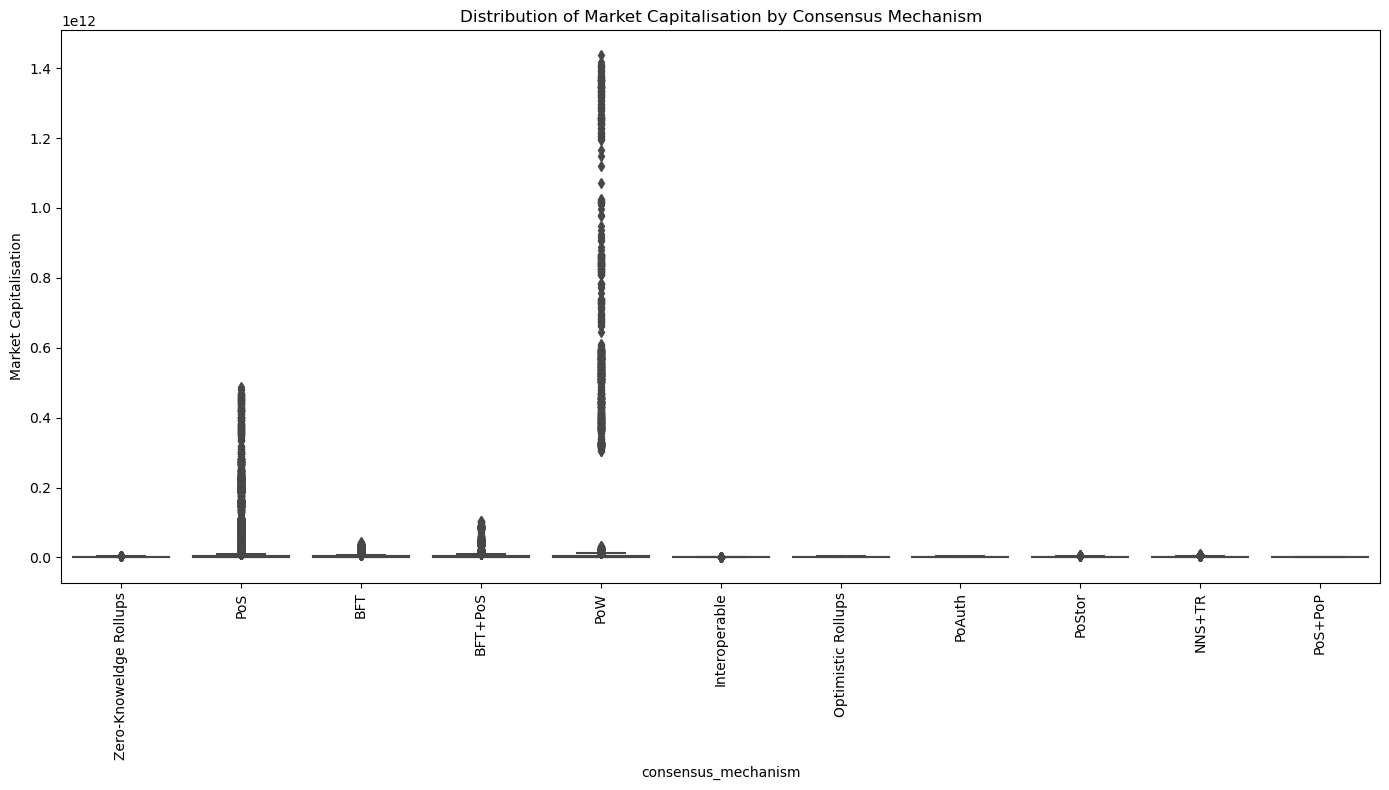

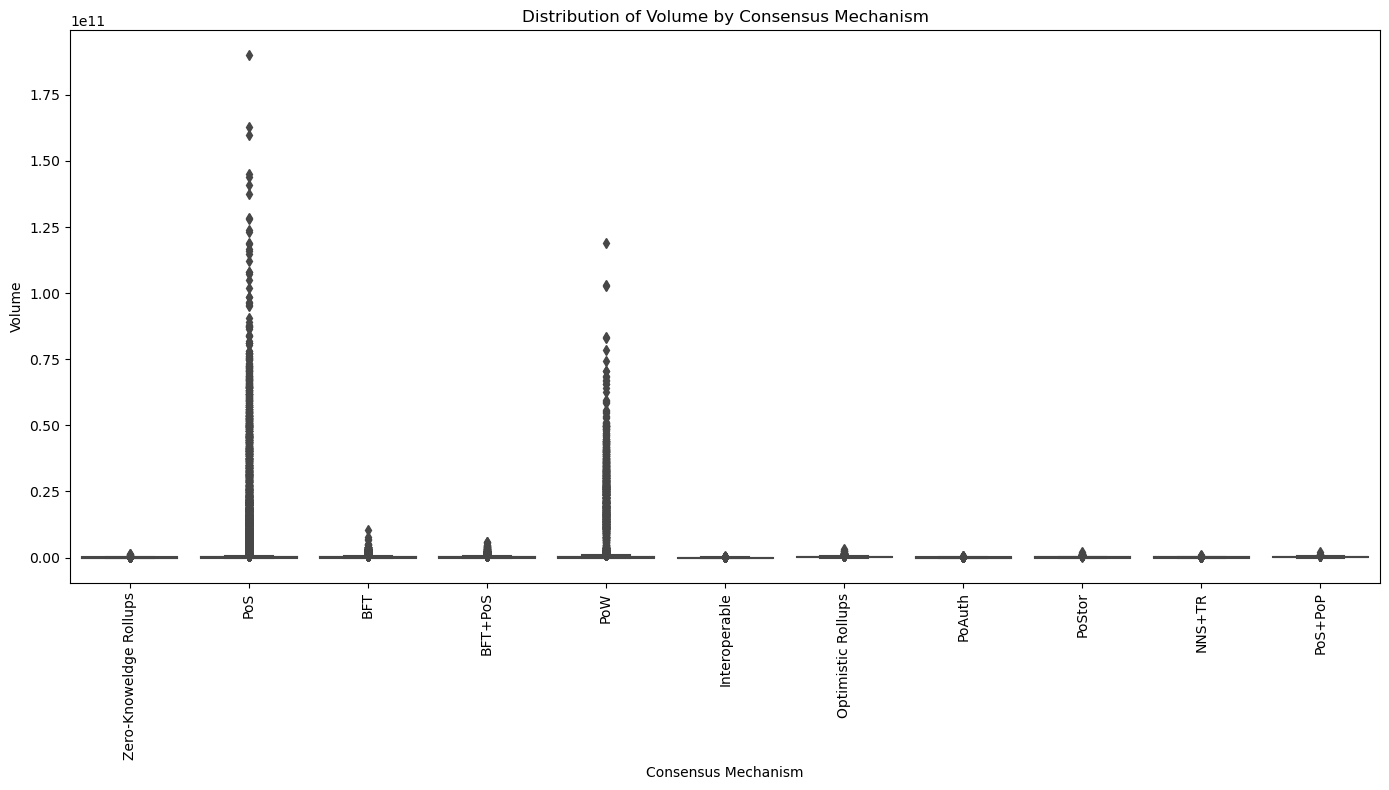

In [27]:
#Distribution of market capitalisation and volume for different consensus mechanisms

#Plotting distribution of market capitalisation
plt.figure(figsize=(14, 8))
sns.boxplot(x='consensus_mechanism', y='market_cap', data=combined_df)
plt.xlabel('consensus_mechanism')
plt.ylabel('Market Capitalisation')
plt.title('Distribution of Market Capitalisation by Consensus Mechanism')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Plotting distribution of volume
plt.figure(figsize=(14, 8))
sns.boxplot(x='consensus_mechanism', y='volume', data=combined_df)
plt.xlabel('Consensus Mechanism')
plt.ylabel('Volume')
plt.title('Distribution of Volume by Consensus Mechanism')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
#Average market cap by consensus mechanism over time

#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the mean market_cap
average_market_cap_by_time_and_consensus = combined_df.groupby(['consensus_mechanism', 'timestamp'])['market_cap'].mean().reset_index()

#Getting unique consensus mechanisms
unique_consensus_mechanisms = average_market_cap_by_time_and_consensus['consensus_mechanism'].unique()

#Assigning colours from the Viridis256 colourmap
colours = [Viridis256[int(i * 255 / (len(unique_consensus_mechanisms) - 1))] for i in range(len(unique_consensus_mechanisms))]

#Creating a colour mapping dictionary
colour_mapping = {consensus_mechanism: colours[i] for i, consensus_mechanism in enumerate(unique_consensus_mechanisms)}

#Creating the plot
output_notebook()  #Use output_file("crypto_avg_market_cap_by_consensus.html") to save it as a file
output_file("crypto_avg_market_cap_by_consensus.html")
p = figure(title="Average Market Capitalisation by Consensus Mechanism Over Time", x_axis_label='Date', y_axis_label='Average Market Capitalisation', x_axis_type='datetime', 
           width=1000, height=650)

#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = average_market_cap_by_time_and_consensus[average_market_cap_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'market_cap', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, average market cap and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), ("Average Market Cap (USD $)", "@market_cap{0,0}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [29]:
#Average market cap by consensus mechanism over time (excluding Bitcoin to adjust for skew/popularity)

#Removing Bitcoin from the consensus mechanism list
filtered_df = combined_df[combined_df['name'] != 'Bitcoin']

#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the mean market_cap
filtered_average_market_cap_by_time_and_consensus = filtered_df.groupby(['consensus_mechanism', 'timestamp'])['market_cap'].mean().reset_index()

#Getting unique consensus mechanisms
filtered_unique_consensus_mechanisms = filtered_average_market_cap_by_time_and_consensus['consensus_mechanism'].unique()

#Assigning colours from the Viridis256 colourmap
colours = [Viridis256[int(i * 255 / (len(filtered_unique_consensus_mechanisms) - 1))] for i in range(len(filtered_unique_consensus_mechanisms))]

#Creating a colour mapping dictionary
colour_mapping = {consensus_mechanism: colours[i] for i, consensus_mechanism in enumerate(filtered_unique_consensus_mechanisms)}

#Creating the plot
output_notebook()  #Use output_file("crypto_avg_market_cap_by_consensus_excluding_bitcoin.html") to save it as a file
output_file("crypto_avg_market_cap_by_consensus_excluding_bitcoin.html")
p = figure(title="Average Market Capitalisation by Consensus Mechanism Over Time (Excluding Bitcoin)", x_axis_label='Date', y_axis_label='Average Market Capitalisation', x_axis_type='datetime', 
           width=1000, height=650)

#Adding a line plot for each consensus mechanism
for consensus_mechanism in filtered_unique_consensus_mechanisms:
    subset = filtered_average_market_cap_by_time_and_consensus[filtered_average_market_cap_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'market_cap', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, average market cap and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), ("Average Market Cap (USD $)", "@market_cap{0,0}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [30]:
#Average volume by consensus mechanism over time

#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the mean volume
average_volume_by_time_and_consensus = combined_df.groupby(['consensus_mechanism', 'timestamp'])['volume'].mean().reset_index()

#Creating the plot
output_notebook()  #Use output_file("crypto_avg_market_cap_by_consensus.html") to save it as a file
p = figure(title="Average Volume by Consensus Mechanism Over Time", x_axis_label='Date', y_axis_label='Average Volume', x_axis_type='datetime', width=1000, height=650)

#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = average_volume_by_time_and_consensus[average_volume_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'volume', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, volume and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), ("Volume (USD $)", "@volume{0,0}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [31]:
#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the mean prices
average_prices_by_time_and_consensus = combined_df.groupby(['consensus_mechanism', 'timestamp'])[['open', 'high', 'low', 'close']].mean().reset_index()

#Creating plots
output_notebook()  #Use output_file("crypto_price_movement_by_consensus.html") to save it as a file

#Defining function to add a plot
def add_price_plot(y_column, title, y_label):
    p = figure(title=title, x_axis_label='Date', y_axis_label=y_label, x_axis_type='datetime', width=1000, height=650)
    for consensus_mechanism in unique_consensus_mechanisms:
        subset = average_prices_by_time_and_consensus[average_prices_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
        source = ColumnDataSource(subset)
        p.line('timestamp', y_column, color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)
    #Adding hover tool
    hover = HoverTool()
    hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), (f"{y_label} (USD $)", f"@{y_column}{{0,0.0000}}"), ("Date", "@timestamp{%Y-%m-%d}")]
    hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
    p.add_tools(hover)
    #Customising legend
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    p.legend.background_fill_alpha = 0
    show(p)

#Plotting average opening prices
add_price_plot('open', 'Average Opening Price by Consensus Mechanism Over Time', 'Average Opening Price')
#Plotting average high prices
add_price_plot('high', 'Average High Price by Consensus Mechanism Over Time', 'Average High Price')
#Plotting average low prices
add_price_plot('low', 'Average Low Price by Consensus Mechanism Over Time', 'Average Low Price')
#Plotting average closing prices
add_price_plot('close', 'Average Closing Price by Consensus Mechanism Over Time', 'Average Closing Price')

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

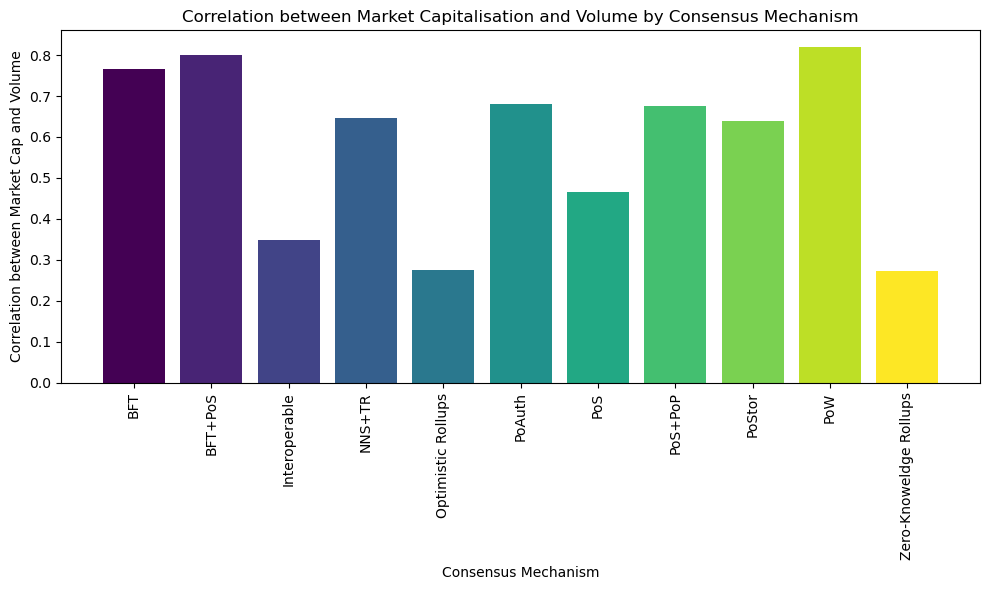

In [32]:
#Analysis of correlation between market cap and volume for different consensus_mechanisms

#Calculating correlation between market_cap and volume for each consensus_mechanism
correlation_by_consensus = combined_df.groupby('consensus_mechanism').apply(lambda x: x['market_cap'].corr(x['volume'])).reset_index(name='correlation')

#Generating colours using the viridis colormap
num_consensus = correlation_by_consensus.shape[0]
colours = cm.viridis(np.linspace(0, 1, num_consensus))

#Plotting the correlation
plt.figure(figsize=(10, 6))
plt.bar(correlation_by_consensus['consensus_mechanism'], correlation_by_consensus['correlation'], color=colours)
plt.xlabel('Consensus Mechanism')
plt.ylabel('Correlation between Market Cap and Volume')
plt.title('Correlation between Market Capitalisation and Volume by Consensus Mechanism')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
#Volume to market cap ratio by consensus mechanism over time

#Calculating the volume to market cap ratio
combined_df['volume_to_market_cap'] = combined_df['volume'] / combined_df['market_cap']

#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the mean volume to market cap ratio
average_ratio_by_time_and_consensus = combined_df.groupby(['consensus_mechanism', 'timestamp'])['volume_to_market_cap'].mean().reset_index()

#Creating the plot
output_notebook()  #Use output_file("crypto_volume_to_market_cap_ratio.html") to save it as a file
p = figure(title="Average Volume to Market Cap Ratio by Consensus Mechanism Over Time", x_axis_label='Date', y_axis_label='Volume to Market Cap Ratio', x_axis_type='datetime', width=1000, height=650)
#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = average_ratio_by_time_and_consensus[average_ratio_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'volume_to_market_cap', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, ratio and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), ("Average Volume to Market Cap Ratio", "@volume_to_market_cap{0.00}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [35]:
#Market share of different consensus mechanisms over time

#Calculating the total market_cap for each timestamp
total_market_cap_by_time = combined_df.groupby('timestamp')['market_cap'].sum().reset_index(name='total_market_cap')

#Merging with the original dataframe to get the market share
combined_df = pd.merge(combined_df, total_market_cap_by_time, on='timestamp')
combined_df['market_share'] = combined_df['market_cap'] / combined_df['total_market_cap']

#Grouping by 'consensus_mechanism' and 'timestamp' and calculating the total market share
average_market_share_by_time_and_consensus = combined_df.groupby(['consensus_mechanism', 'timestamp'])['market_share'].sum().reset_index()

In [36]:
average_market_share_by_time_and_consensus[average_market_share_by_time_and_consensus['consensus_mechanism'] == 'PoW']

consensus_mechanism                        timestamp  market_share
6417                 PoW 2022-05-11 23:59:59.999000+00:00      0.495637
6418                 PoW 2022-05-12 23:59:59.999000+00:00      0.505957
6419                 PoW 2022-05-13 23:59:59.999000+00:00      0.498597
6420                 PoW 2022-05-14 23:59:59.999000+00:00      0.500943
6421                 PoW 2022-05-15 23:59:59.999000+00:00      0.501270
...                  ...                              ...           ...
7176                 PoW 2024-06-08 23:59:59.999000+00:00      0.579436
7177                 PoW 2024-06-09 23:59:59.999000+00:00      0.578770
7178                 PoW 2024-06-10 23:59:59.999000+00:00      0.582350
7179                 PoW 2024-06-11 23:59:59.999000+00:00      0.583944
7180                 PoW 2024-06-12 23:59:59.999000+00:00      0.581832

[764 rows x 3 columns]

In [37]:
#Plotting market share of different consensus mechanisms over time

output_notebook()  # Use output_file("crypto_market_share_by_consensus.html") to save it as a file
p = figure(title="Total Market Share by Consensus Mechanism Over Time", 
           x_axis_label='Date', 
           y_axis_label='Market Share', 
           x_axis_type='datetime', 
           width=1000, 
           height=650)
#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = average_market_share_by_time_and_consensus[average_market_share_by_time_and_consensus['consensus_mechanism'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'market_share', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)
#Adding hover tool showing the consensus mechanism, market share and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism"), ("Market Share", "@market_share{0.00%}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  # Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [38]:
combined_df

time_open                       time_close  \
0     2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
1     2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
2     2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
3     2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
4     2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
...                         ...                              ...   
64504 2023-05-11 00:00:00+00:00 2023-05-11 23:59:59.999000+00:00   
64505 2023-05-11 00:00:00+00:00 2023-05-11 23:59:59.999000+00:00   
64506 2023-05-11 00:00:00+00:00 2023-05-11 23:59:59.999000+00:00   
64507 2023-05-11 00:00:00+00:00 2023-05-11 23:59:59.999000+00:00   
64508 2023-05-11 00:00:00+00:00 2023-05-11 23:59:59.999000+00:00   

                      time_high                  time_low           name  \
0     2024-06-12 13:08:00+00:00 2024-06-12 01:49:00+00:00       Starknet   
1     2024-06-12 18:00:00+00:00 2024-06-12 01:50:00+00:00            Sui   
2     2024-06-12 17:56:00+00:00 2024-06-12 01:49:00+00:00   Pyth Network   
3     2024-06-12 15:10:00+00:00 2024-06-12 07:06:00+00:00            Dai   
4     2024-06-12 13:19:00+00:00 2024-06-12 01:43:00+00:00   KuCoin Token   
...                         ...                       ...            ...   
64504 2023-05-11 00:00:00+00:00 2023-05-11 19:49:00+00:00        Arweave   
64505 2023-05-11 00:01:00+00:00 2023-05-11 18:22:00+00:00        Conflux   
64506 2023-05-11 00:12:00+00:00 2023-05-11 17:49:00+00:00        Bitcoin   
64507 2023-05-11 00:00:00+00:00 2023-05-11 18:23:00+00:00  NEAR Protocol   
64508 2023-05-11 00:00:00+00:00 2023-05-11 19:49:00+00:00          Maker   

               open          high           low         close        volume  \
0          1.035496      1.104741      0.995784      1.071657  9.352629e+07   
1          0.992833      1.051977      0.962772      1.018155  2.505854e+08   
2          0.382636      0.418411      0.369577      0.400217  1.175223e+08   
3          1.000007      1.000257      0.999769      1.000019  3.351678e+08   
4         10.113123     10.771774     10.068958     10.638888  2.213672e+06   
...             ...           ...           ...           ...           ...   
64504      7.007625      7.007625      6.392374      6.472723  1.136174e+07   
64505      0.271288      0.271635      0.242270      0.255997  1.130013e+08   
64506  27621.086872  27621.941986  26781.827002  27000.788271  1.672434e+10   
64507      1.662428      1.662428      1.560910      1.598594  5.288378e+07   
64508    660.642730    660.642730    610.821145    622.258175  2.061300e+07   

         market_cap                        timestamp     consensus_mechanism  \
0      1.393489e+09 2024-06-12 23:59:59.999000+00:00  Zero-Knoweldge Rollups   
1      2.470190e+09 2024-06-12 23:59:59.999000+00:00                     BFT   
2      1.450781e+09 2024-06-12 23:59:59.999000+00:00                     BFT   
3      5.347991e+09 2024-06-12 23:59:59.999000+00:00                     PoS   
4      1.017535e+09 2024-06-12 23:59:59.999000+00:00                     PoS   
...             ...                              ...                     ...   
64504  2.161547e+08 2023-05-11 23:59:59.999000+00:00                  PoStor   
64505  7.367516e+08 2023-05-11 23:59:59.999000+00:00                     PoW   
64506  5.230230e+11 2023-05-11 23:59:59.999000+00:00                     PoW   
64507  1.437426e+09 2023-05-11 23:59:59.999000+00:00                     PoS   
64508  6.083389e+08 2023-05-11 23:59:59.999000+00:00                     PoS   

       volume_to_market_cap  total_market_cap  market_share  
0                  0.067117      2.409373e+12      0.000578  
1                  0.101444      2.409373e+12      0.001025  
2                  0.081006      2.409373e+12      0.000602  
3                  0.062672      2.409373e+12      0.002220  
4                  0.002176      2.409373e+12      0.000422  
...       

In [39]:
#Sorting the DataFrame by 'name' and 'timestamp'
combined_df_sorted = combined_df.sort_values(by=['name', 'timestamp']).reset_index()
combined_df_sorted.loc[750:800]

index                 time_open                       time_close  \
750   1390 2024-05-30 00:00:00+00:00 2024-05-30 23:59:59.999000+00:00   
751   1290 2024-05-31 00:00:00+00:00 2024-05-31 23:59:59.999000+00:00   
752   1190 2024-06-01 00:00:00+00:00 2024-06-01 23:59:59.999000+00:00   
753   1090 2024-06-02 00:00:00+00:00 2024-06-02 23:59:59.999000+00:00   
754    990 2024-06-03 00:00:00+00:00 2024-06-03 23:59:59.999000+00:00   
755    890 2024-06-04 00:00:00+00:00 2024-06-04 23:59:59.999000+00:00   
756    790 2024-06-05 00:00:00+00:00 2024-06-05 23:59:59.999000+00:00   
757    690 2024-06-06 00:00:00+00:00 2024-06-06 23:59:59.999000+00:00   
758    590 2024-06-07 00:00:00+00:00 2024-06-07 23:59:59.999000+00:00   
759    490 2024-06-08 00:00:00+00:00 2024-06-08 23:59:59.999000+00:00   
760    390 2024-06-09 00:00:00+00:00 2024-06-09 23:59:59.999000+00:00   
761    290 2024-06-10 00:00:00+00:00 2024-06-10 23:59:59.999000+00:00   
762    190 2024-06-11 00:00:00+00:00 2024-06-11 23:59:59.999000+00:00   
763     90 2024-06-12 00:00:00+00:00 2024-06-12 23:59:59.999000+00:00   
764  39216 2022-05-11 00:00:00+00:00 2022-05-11 23:59:59.999000+00:00   
765  39143 2022-05-12 00:00:00+00:00 2022-05-12 23:59:59.999000+00:00   
766  39070 2022-05-13 00:00:00+00:00 2022-05-13 23:59:59.999000+00:00   
767  38997 2022-05-14 00:00:00+00:00 2022-05-14 23:59:59.999000+00:00   
768  38924 2022-05-15 00:00:00+00:00 2022-05-15 23:59:59.999000+00:00   
769  38851 2022-05-16 00:00:00+00:00 2022-05-16 23:59:59.999000+00:00   
770  38778 2022-05-17 00:00:00+00:00 2022-05-17 23:59:59.999000+00:00   
771  38705 2022-05-18 00:00:00+00:00 2022-05-18 23:59:59.999000+00:00   
772  38632 2022-05-19 00:00:00+00:00 2022-05-19 23:59:59.999000+00:00   
773  38559 2022-05-20 00:00:00+00:00 2022-05-20 23:59:59.999000+00:00   
774  38486 2022-05-21 00:00:00+00:00 2022-05-21 23:59:59.999000+00:00   
775  38413 2022-05-22 00:00:00+00:00 2022-05-22 23:59:59.999000+00:00   
776  38340 2022-05-23 00:00:00+00:00 2022-05-23 23:59:59.999000+00:00   
777  38267 2022-05-24 00:00:00+00:00 2022-05-24 23:59:59.999000+00:00   
778  38194 2022-05-25 00:00:00+00:00 2022-05-25 23:59:59.999000+00:00   
779  38121 2022-05-26 00:00:00+00:00 2022-05-26 23:59:59.999000+00:00   
780  38048 2022-05-27 00:00:00+00:00 2022-05-27 23:59:59.999000+00:00   
781  37975 2022-05-28 00:00:00+00:00 2022-05-28 23:59:59.999000+00:00   
782  37902 2022-05-29 00:00:00+00:00 2022-05-29 23:59:59.999000+00:00   
783  37829 2022-05-30 00:00:00+00:00 2022-05-30 23:59:59.999000+00:00   
784  37756 2022-05-31 00:00:00+00:00 2022-05-31 23:59:59.999000+00:00   
785  37682 2022-06-01 00:00:00+00:00 2022-06-01 23:59:59.999000+00:00   
786  37607 2022-06-02 00:00:00+00:00 2022-06-02 23:59:59.999000+00:00   
787  37532 2022-06-03 00:00:00+00:00 2022-06-03 23:59:59.999000+00:00   
788  37457 2022-06-04 00:00:00+00:00 2022-06-04 23:59:59.999000+00:00   
789  37382 2022-06-05 00:00:00+00:00 2022-06-05 23:59:59.999000+00:00   
790  37307 2022-06-06 00:00:00+00:00 2022-06-06 23:59:59.999000+00:00   
791  37232 2022-06-07 00:00:00+00:00 2022-06-07 23:59:59.999000+00:00   
792  37157 2022-06-08 00:00:00+00:00 2022-06-08 23:59:59.999000+00:00   
793  37082 2022-06-09 00:00:00+00:00 2022-06-09 23:59:59.999000+00:00   
794  37007 2022-06-10 00:00:00+00:00 2022-06-10 23:59:59.999000+00:00   
795  36932 2022-06-11 00:00:00+00:00 2022-06-11 23:59:59.999000+00:00   
796  36857 2022-06-12 00:00:00+00:00 2022-06-12 23:59:59.999000+00:00   
797  36782 2022-06-13 00:00:00+00:00 2022-06-13 23:59:59.999000+00:00   
798  36707 2022-06-14 00:00:00+00:00 2022-06-14 23:59:59.999000+00:00   
799  36632 2022-06-15 00:00:00+00:00 2022-06-15 23:59:59.999000+00:00   
800  36557 2022-06-16 00:00:00+00:00 2022-06-16 23:59:59.999000+00:00   

                    time_high                  time_low           name  \
750 2024-05-30 17:41:00+00:00 2024-05-30 08:16:00+00:00           Aave   
751 2024-05-31 12:52:00+00:00 2024-05-31 16:16:00+00:00     

In [40]:
#Should be True
print(combined_df_sorted.index.is_unique)
#Check the index to see if it's a simple RangeIndex
print(combined_df_sorted.index)

True
RangeIndex(start=0, stop=64509, step=1)


In [41]:
#Computing log returns using the transform method (using the apply method causes indexing issues)
combined_df_sorted['log_return'] = combined_df_sorted.groupby('name')['close'].transform(lambda x: np.log(x / x.shift(1)))

In [42]:
#Calculating volatility for each crypto by finding the standard deviation of the daily log returns and annualising the results

#Grouping by 'name' to calculate annualised volatility for each cryptocurrency
combined_df_volatility = combined_df_sorted.groupby('name').agg({'log_return': lambda x: np.std(x.dropna()) * np.sqrt(365)}).reset_index()

#Renaming column for clarity
combined_df_volatility.rename(columns={'log_return': 'annualised_volatility'}, inplace=True)

#Sorting by volatility (ascending = True to show least volatile cryptos first)
combined_df_volatility = combined_df_volatility.sort_values(by='annualised_volatility', ascending=True)
combined_df_volatility

#As expected, we should see stablecoins at the top of this list, as they are generally less volatile

name  annualised_volatility
84        Tether USDt               0.007415
38  First Digital USD               0.024505
27                Dai               0.024561
91               USDC               0.025127
92               USDD               0.049849
..                ...                    ...
17               Bonk               2.365298
18      Brett (Based)               2.635915
99          dogwifhat               2.870180
62            Notcoin               2.939052
16          Bittensor               5.918015

[100 rows x 2 columns]

In [43]:
#Calculating average annualised volatility for each consensus mechanism

#Merging volatility data with consensus mechanism data
combined_df_sorted_copy = combined_df_sorted.copy()
merged_df = pd.merge(combined_df_volatility, combined_df_sorted_copy[['name', 'consensus_mechanism']].drop_duplicates(), on='name')

#Grouping by 'consensus_mechanism' to calculate average volatility
consensus_volatility_df = merged_df.groupby('consensus_mechanism').agg({'annualised_volatility': 'mean'}).reset_index()
consensus_volatility_df = consensus_volatility_df.sort_values(by='annualised_volatility', ascending=True)

#Renaming column for clarity
consensus_volatility_df.rename(columns={'annualised_volatility': 'average_annualised_volatility'}, inplace=True)

consensus_volatility_df

consensus_mechanism  average_annualised_volatility
2            Interoperable                       0.766079
5                   PoAuth                       0.856620
1                  BFT+PoS                       0.932432
3                   NNS+TR                       0.943861
4       Optimistic Rollups                       0.973242
10  Zero-Knoweldge Rollups                       1.019584
6                      PoS                       1.020582
0                      BFT                       1.032148
8                   PoStor                       1.065675
9                      PoW                       1.394129
7                  PoS+PoP                       1.456980

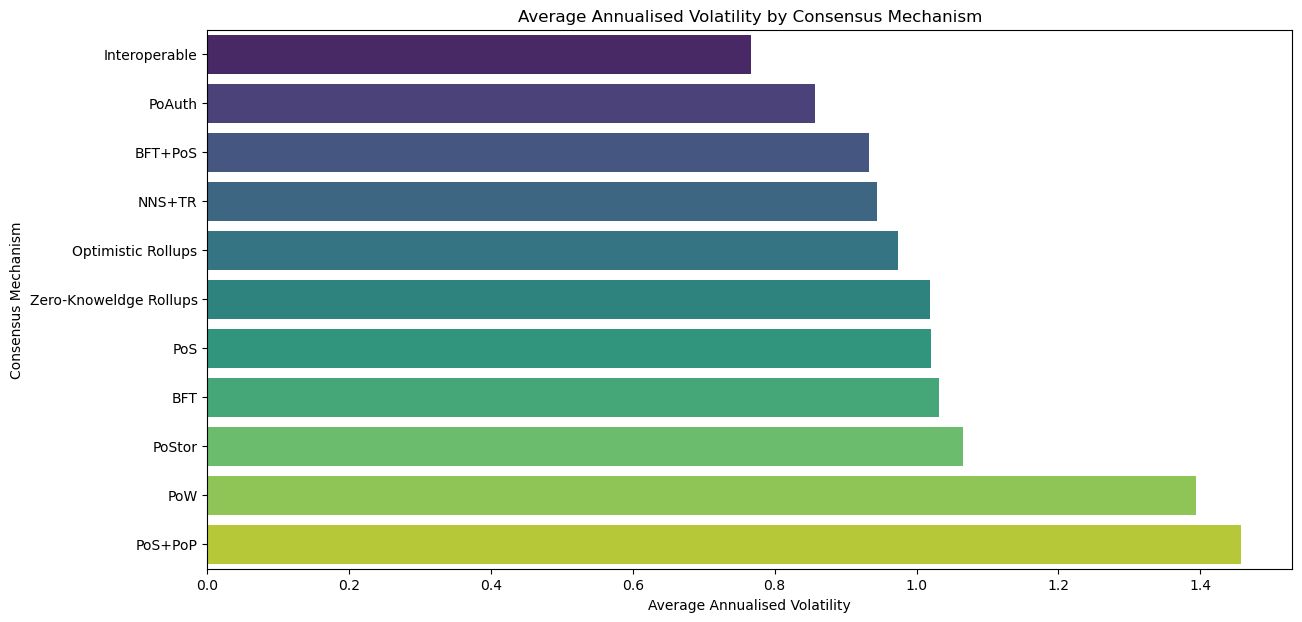

In [44]:
#Plotting the average annualised volatility by consensus mechanism

plt.figure(figsize=(14, 7))
sns.barplot(x='average_annualised_volatility', y='consensus_mechanism', data=consensus_volatility_df, palette='viridis')
plt.title('Average Annualised Volatility by Consensus Mechanism')
plt.xlabel('Average Annualised Volatility')
plt.ylabel('Consensus Mechanism')
plt.savefig('average_annualised_volatility_by_consensus_mechanism.png')
plt.show()

In [45]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64509 entries, 0 to 64508
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   time_open             64509 non-null  datetime64[ns, UTC]
 1   time_close            64509 non-null  datetime64[ns, UTC]
 2   time_high             64509 non-null  datetime64[ns, UTC]
 3   time_low              64509 non-null  datetime64[ns, UTC]
 4   name                  64509 non-null  object             
 5   open                  64509 non-null  float64            
 6   high                  64509 non-null  float64            
 7   low                   64509 non-null  float64            
 8   close                 64509 non-null  float64            
 9   volume                64509 non-null  float64            
 10  market_cap            64509 non-null  float64            
 11  timestamp             64509 non-null  datetime64[ns, UTC]
 12  cons

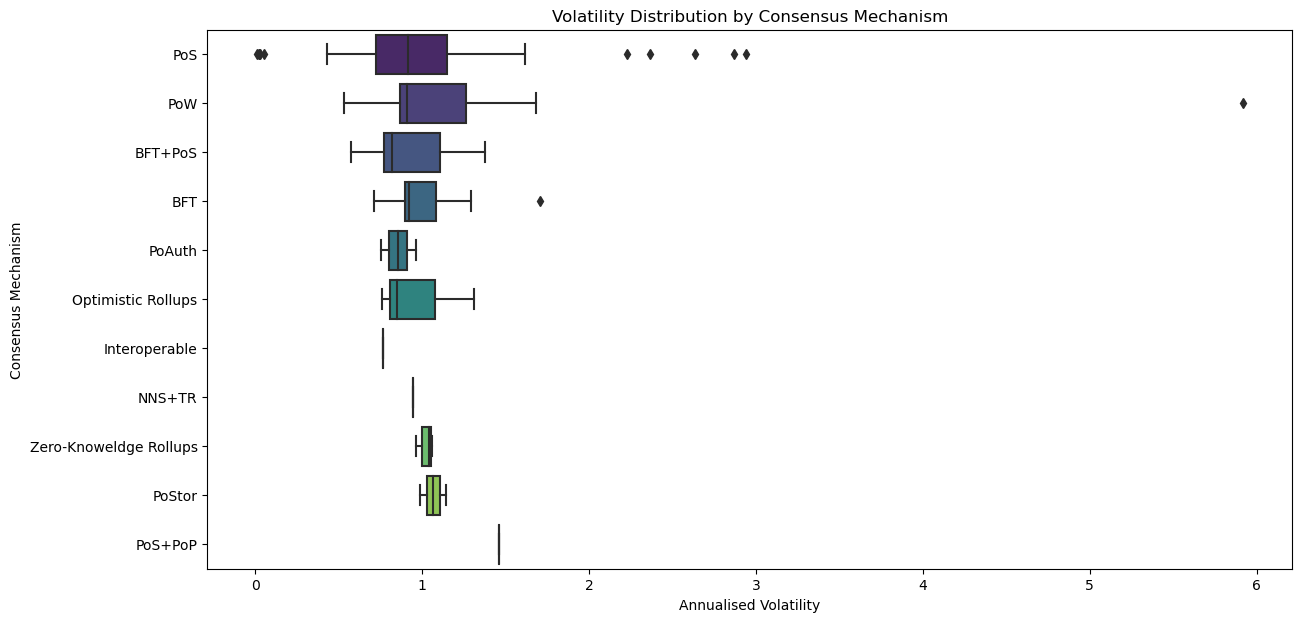

In [46]:
#Plotting volatility distribution for each consensus mechanism

plt.figure(figsize=(14, 7))
sns.boxplot(x='annualised_volatility', y='consensus_mechanism', data=merged_df, palette='viridis')
plt.title('Volatility Distribution by Consensus Mechanism')
plt.xlabel('Annualised Volatility')
plt.ylabel('Consensus Mechanism')
plt.savefig('volatility_distribution_by_consensus_mechanism.png')
plt.show()

In [47]:
#Visualising monthly rolling volatility for each consensus mechanism

#Calculating monthly rolling volatility for each cryptocurrency
combined_df_sorted['rolling_volatility'] = combined_df_sorted.groupby('name')['log_return'].transform(lambda x: x.rolling(window=30).std() * np.sqrt(365))

#Merging with consensus mechanism data
combined_df_with_rolling = pd.merge(combined_df_sorted, combined_df_sorted[['name', 'consensus_mechanism']].drop_duplicates(), on='name')

#Getting unique consensus mechanisms
unique_consensus_mechanisms = combined_df_with_rolling['consensus_mechanism_x'].unique()

#Assigning colours from the Viridis256 colourmap
colours = [Viridis256[int(i * 255 / (len(unique_consensus_mechanisms) - 1))] for i in range(len(unique_consensus_mechanisms))]

#Creating a colour mapping dictionary
colour_mapping = {consensus_mechanism: colours[i] for i, consensus_mechanism in enumerate(unique_consensus_mechanisms)}

#Creating the Bokeh plot
output_notebook()
output_file("crypto_rolling_volatility_by_consensus.html")
p = figure(title="Rolling Volatility Over Time by Consensus Mechanism", x_axis_label='Date', y_axis_label='Rolling Annualised Volatility', x_axis_type='datetime', 
           width=1000, height=650)

#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = combined_df_with_rolling[combined_df_with_rolling['consensus_mechanism_x'] == consensus_mechanism]
    subset_grouped = subset.groupby('timestamp').agg({'rolling_volatility': 'mean'}).reset_index()
    subset_grouped['consensus_mechanism_x'] = consensus_mechanism  #Adding the consensus_mechanism column for hover tooltips
    source = ColumnDataSource(subset_grouped)
    p.line('timestamp', 'rolling_volatility', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, rolling volatility, and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism_x"), ("Rolling Volatility", "@rolling_volatility{0.00}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [48]:
#Plotting the moving averages of rolling volatility over time for each consensus mechanism

#Calculating moving averages of rolling volatility for each consensus mechanism
moving_averages = []
for consensus_mechanism in unique_consensus_mechanisms:
    subset = combined_df_with_rolling[combined_df_with_rolling['consensus_mechanism_x'] == consensus_mechanism]
    subset_grouped = subset.groupby('timestamp').agg({'rolling_volatility': 'mean'}).reset_index()
    subset_grouped['rolling_volatility_ma'] = subset_grouped['rolling_volatility'].rolling(window=30).mean()
    subset_grouped['consensus_mechanism_x'] = consensus_mechanism
    moving_averages.append(subset_grouped)

#Combining moving averages into a single DataFrame
combined_moving_averages = pd.concat(moving_averages)

#Creating the Bokeh plot
output_notebook()  #Use output_file("crypto_moving_average_volatility_by_consensus.html") to save it as a file
output_file("crypto_moving_average_volatility_by_consensus.html")
p = figure(title="Moving Average of Rolling Volatility Over Time by Consensus Mechanism", x_axis_label='Date', y_axis_label='Rolling Annualised Volatility MA', 
           x_axis_type='datetime', 
           width=1000, height=650)

#Adding a line plot for each consensus mechanism
for consensus_mechanism in unique_consensus_mechanisms:
    subset = combined_moving_averages[combined_moving_averages['consensus_mechanism_x'] == consensus_mechanism]
    source = ColumnDataSource(subset)
    p.line('timestamp', 'rolling_volatility_ma', color=colour_mapping[consensus_mechanism], legend_label=consensus_mechanism, source=source)

#Adding hover tool showing the consensus mechanism, moving average of rolling volatility, and date (date in ISO 8601 format)
hover = HoverTool()
hover.tooltips = [("Consensus Mechanism", "@consensus_mechanism_x"), ("Rolling Volatility MA", "@rolling_volatility_ma{0.00}"), ("Date", "@timestamp{%Y-%m-%d}")]
hover.formatters = {'@timestamp': 'datetime'}  #Formats the datetime data correctly
p.add_tools(hover)

#Customising legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.background_fill_alpha = 0

show(p)

Loading BokehJS ...

(B=(B(BGetting file://localhost/home/4466042a-6cd1-479d-a596-4a96c262effe/Crypto%20Ana(B

>

In [49]:
#Implementing the ANOVA test to determine statistically significant differences in volatility between consensus mechanisms

#Importing statistical library
import scipy.stats as stats

#Sorting the DataFrame by name and timestamp
df_sig = combined_df.sort_values(by=['name', 'timestamp'])

#Calculating log returns
df_sig['log_return'] = np.log(combined_df['close'] / df_sig['close'].shift(1))

#Calculating rolling volatility (annualised)
df_sig['rolling_volatility'] = df_sig.groupby('name')['log_return'].transform(lambda x: x.rolling(window=30).std() * np.sqrt(365))

#Dropping NaN values in rolling_volatility (for first value in each 'name' group)
df_sig = df_sig.dropna(subset=['rolling_volatility'])

#Keeping only necessary columns for the ANOVA test
df_sig = df_sig[['name', 'rolling_volatility', 'consensus_mechanism']]

#Grouping data for ANOVA
anova_data = df_sig[['consensus_mechanism', 'rolling_volatility']]

#Performing ANOVA
anova_result = stats.f_oneway(
    *[anova_data[anova_data['consensus_mechanism'] == cm]['rolling_volatility'] 
      for cm in anova_data['consensus_mechanism'].unique()]
)
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

F-statistic: 44.101241051748666
P-value: 3.678683125680038e-88


In [50]:
#Conducting Post-Hoc Analysis if ANOVA is significant

from statsmodels.stats.multicomp import pairwise_tukeyhsd

if anova_result.pvalue < 0.05:
    print("The choice of consensus mechanism is statistically significant to the volatility experienced by a cryptocurrency.")
    #Performing Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=anova_data['rolling_volatility'], 
                                     groups=anova_data['consensus_mechanism'], 
                                     alpha=0.05)
    print(tukey_result)
else:
    print("The choice of consensus mechanism is not statistically significant to the volatility experienced by a cryptocurrency.")

The choice of consensus mechanism is statistically significant to the volatility experienced by a cryptocurrency.
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1               group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               BFT                BFT+PoS  -0.1021    0.0 -0.1594 -0.0449   True
               BFT          Interoperable  -0.2074    0.0 -0.3261 -0.0887   True
               BFT                 NNS+TR  -0.0554   0.92 -0.1741  0.0634  False
               BFT     Optimistic Rollups   0.0598 0.5213 -0.0286  0.1481  False
               BFT                 PoAuth  -0.1074 0.0038 -0.1949 -0.0199   True
               BFT                    PoS  -0.1245    0.0 -0.1633 -0.0858   True
               BFT                PoS+PoP   0.5525    0.0  0.3703  0.7347   True
               BFT                 PoStor   0.0741 0.1888 -0.0134  0.1616  F